In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 1024.", name="epoch 1000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=1000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1024)              1051648   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 1,077,273
Trainable params: 1,077,273
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/1000
4/5 [=======================>......] - ETA: 0s - loss: 1.5992 - mae: 1.0278INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 689ms/step - loss: 1.7997 - mae: 1.0925 - val_loss: 2.2796 - val_mae: 1.2486
Epoch 2/1000
5/5 [==============================] - 1s 146ms/step - loss: 3.0782 - mae: 1.4142 - val_loss: 3.4510 - val_mae: 1.6681
Epoch 3/1000
5/5 [==============================] - ETA: 0s - loss: 1.7261 - mae: 1.1030INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 540ms/step - loss: 1.7261 - mae: 1.1030 - val_loss: 0.4300 - val_mae: 0.5336
Epoch 4/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.9942 - mae: 0.8352INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 527ms/step - loss: 0.9886 - mae: 0.8374 - val_loss: 0.3718 - val_mae: 0.4933
Epoch 5/1000
5/5 [==============================] - 1s 196ms/step - loss: 5.9287 - mae: 1.9185 - val_loss: 4.6993 - val_mae: 2.0313
Epoch 6/1000
5/5 [==============================] - 1s 149ms/step - loss: 1.8703 - mae: 1.1098 - val_loss: 1.7793 - val_mae: 1.2283
Epoch 7/1000
5/5 [==============================] - 1s 150ms/step - loss: 2.5741 - mae: 1.5032 - val_loss: 2.1084 - val_mae: 1.3080
Epoch 8/1000
5/5 [==============================] - 1s 152ms/step - loss: 1.1683 - mae: 0.8906 - val_loss: 0.4230 - val_mae: 0.5285
Epoch 9/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.7107 - mae: 0.7176 - val_loss: 0.9013 - val_mae: 0.8196
Epoch 10/1000
5/5 [==============================] - ETA: 0s - loss: 0.6939 - mae: 0.6855INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\mo

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 513ms/step - loss: 0.6939 - mae: 0.6855 - val_loss: 0.3122 - val_mae: 0.4543
Epoch 11/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.3314 - mae: 0.4717 - val_loss: 0.4022 - val_mae: 0.5252
Epoch 12/1000
5/5 [==============================] - ETA: 0s - loss: 0.3594 - mae: 0.4915INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 519ms/step - loss: 0.3594 - mae: 0.4915 - val_loss: 0.2516 - val_mae: 0.4062
Epoch 13/1000
5/5 [==============================] - ETA: 0s - loss: 0.2313 - mae: 0.3924INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 546ms/step - loss: 0.2313 - mae: 0.3924 - val_loss: 0.2311 - val_mae: 0.3955
Epoch 14/1000
5/5 [==============================] - ETA: 0s - loss: 0.2346 - mae: 0.3927INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 507ms/step - loss: 0.2346 - mae: 0.3927 - val_loss: 0.2158 - val_mae: 0.3837
Epoch 15/1000
5/5 [==============================] - ETA: 0s - loss: 0.2000 - mae: 0.3675INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 506ms/step - loss: 0.2000 - mae: 0.3675 - val_loss: 0.1931 - val_mae: 0.3641
Epoch 16/1000
5/5 [==============================] - ETA: 0s - loss: 0.2002 - mae: 0.3705INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 579ms/step - loss: 0.2002 - mae: 0.3705 - val_loss: 0.1929 - val_mae: 0.3617
Epoch 17/1000
5/5 [==============================] - ETA: 0s - loss: 0.1922 - mae: 0.3635INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 528ms/step - loss: 0.1922 - mae: 0.3635 - val_loss: 0.1821 - val_mae: 0.3583
Epoch 18/1000
5/5 [==============================] - 1s 179ms/step - loss: 0.1837 - mae: 0.3551 - val_loss: 0.1840 - val_mae: 0.3581
Epoch 19/1000
5/5 [==============================] - ETA: 0s - loss: 0.1829 - mae: 0.3541INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 504ms/step - loss: 0.1829 - mae: 0.3541 - val_loss: 0.1797 - val_mae: 0.3534
Epoch 20/1000
5/5 [==============================] - ETA: 0s - loss: 0.1804 - mae: 0.3526INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 555ms/step - loss: 0.1804 - mae: 0.3526 - val_loss: 0.1785 - val_mae: 0.3524
Epoch 21/1000
5/5 [==============================] - ETA: 0s - loss: 0.1812 - mae: 0.3534INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 527ms/step - loss: 0.1812 - mae: 0.3534 - val_loss: 0.1782 - val_mae: 0.3546
Epoch 22/1000
5/5 [==============================] - 1s 178ms/step - loss: 0.1804 - mae: 0.3524 - val_loss: 0.1821 - val_mae: 0.3551
Epoch 23/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.1817 - mae: 0.3535 - val_loss: 0.1783 - val_mae: 0.3517
Epoch 24/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1760 - mae: 0.3473INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 523ms/step - loss: 0.1804 - mae: 0.3527 - val_loss: 0.1771 - val_mae: 0.3525
Epoch 25/1000
5/5 [==============================] - 1s 175ms/step - loss: 0.1791 - mae: 0.3517 - val_loss: 0.1799 - val_mae: 0.3541
Epoch 26/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.1796 - mae: 0.3519 - val_loss: 0.1778 - val_mae: 0.3534
Epoch 27/1000
5/5 [==============================] - 1s 143ms/step - loss: 0.1805 - mae: 0.3529 - val_loss: 0.1775 - val_mae: 0.3533
Epoch 28/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.1789 - mae: 0.3516 - val_loss: 0.1790 - val_mae: 0.3519
Epoch 29/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.1797 - mae: 0.3519 - val_loss: 0.1780 - val_mae: 0.3511
Epoch 30/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.1810 - mae: 0.3534 - val_loss: 0.1782 - val_mae: 0.3543
Epoch 31/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.1795 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 509ms/step - loss: 0.1788 - mae: 0.3521 - val_loss: 0.1770 - val_mae: 0.3524
Epoch 34/1000
5/5 [==============================] - ETA: 0s - loss: 0.1791 - mae: 0.3520INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 533ms/step - loss: 0.1791 - mae: 0.3520 - val_loss: 0.1765 - val_mae: 0.3512
Epoch 35/1000
5/5 [==============================] - 1s 160ms/step - loss: 0.1802 - mae: 0.3520 - val_loss: 0.1766 - val_mae: 0.3509
Epoch 36/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.1799 - mae: 0.3523 - val_loss: 0.1784 - val_mae: 0.3510
Epoch 37/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.1793 - mae: 0.3518 - val_loss: 0.1783 - val_mae: 0.3553
Epoch 38/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.1816 - mae: 0.3541 - val_loss: 0.1773 - val_mae: 0.3517
Epoch 39/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.1792 - mae: 0.3509 - val_loss: 0.1798 - val_mae: 0.3527
Epoch 40/1000
5/5 [==============================] - ETA: 0s - loss: 0.1789 - mae: 0.3508INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 499ms/step - loss: 0.1789 - mae: 0.3508 - val_loss: 0.1757 - val_mae: 0.3508
Epoch 41/1000
5/5 [==============================] - 1s 181ms/step - loss: 0.1809 - mae: 0.3542 - val_loss: 0.1773 - val_mae: 0.3533
Epoch 42/1000
5/5 [==============================] - ETA: 0s - loss: 0.1803 - mae: 0.3532INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 515ms/step - loss: 0.1803 - mae: 0.3532 - val_loss: 0.1756 - val_mae: 0.3521
Epoch 43/1000
5/5 [==============================] - 1s 167ms/step - loss: 0.1783 - mae: 0.3509 - val_loss: 0.1760 - val_mae: 0.3505
Epoch 44/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.1789 - mae: 0.3515 - val_loss: 0.1767 - val_mae: 0.3495
Epoch 45/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.1785 - mae: 0.3502 - val_loss: 0.1766 - val_mae: 0.3501
Epoch 46/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.1803 - mae: 0.3530 - val_loss: 0.1758 - val_mae: 0.3507
Epoch 47/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.1767 - mae: 0.3494 - val_loss: 0.1779 - val_mae: 0.3512
Epoch 48/1000
5/5 [==============================] - ETA: 0s - loss: 0.1806 - mae: 0.3532INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 531ms/step - loss: 0.1806 - mae: 0.3532 - val_loss: 0.1742 - val_mae: 0.3489
Epoch 49/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.1844 - mae: 0.3549 - val_loss: 0.1770 - val_mae: 0.3502
Epoch 50/1000
5/5 [==============================] - 1s 145ms/step - loss: 0.1789 - mae: 0.3494 - val_loss: 0.1803 - val_mae: 0.3570
Epoch 51/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.1825 - mae: 0.3555 - val_loss: 0.1786 - val_mae: 0.3511
Epoch 52/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.1792 - mae: 0.3503 - val_loss: 0.1749 - val_mae: 0.3487
Epoch 53/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.1827 - mae: 0.3554 - val_loss: 0.1752 - val_mae: 0.3508
Epoch 54/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.1781 - mae: 0.3508 - val_loss: 0.1757 - val_mae: 0.3494
Epoch 55/1000
5/5 [==============================] - 1s 164ms/step - loss: 0.1790 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.1790 - mae: 0.3516 - val_loss: 0.1738 - val_mae: 0.3507
Epoch 60/1000
5/5 [==============================] - ETA: 0s - loss: 0.1766 - mae: 0.3490INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 508ms/step - loss: 0.1766 - mae: 0.3490 - val_loss: 0.1730 - val_mae: 0.3466
Epoch 61/1000
5/5 [==============================] - ETA: 0s - loss: 0.1755 - mae: 0.3480INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 575ms/step - loss: 0.1755 - mae: 0.3480 - val_loss: 0.1717 - val_mae: 0.3473
Epoch 62/1000
5/5 [==============================] - 1s 191ms/step - loss: 0.1758 - mae: 0.3484 - val_loss: 0.1730 - val_mae: 0.3482
Epoch 63/1000
5/5 [==============================] - 1s 166ms/step - loss: 0.1758 - mae: 0.3480 - val_loss: 0.1729 - val_mae: 0.3477
Epoch 64/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.1779 - mae: 0.3494 - val_loss: 0.1739 - val_mae: 0.3477
Epoch 65/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.1771 - mae: 0.3486 - val_loss: 0.1724 - val_mae: 0.3450
Epoch 66/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.1776 - mae: 0.3493 - val_loss: 0.1723 - val_mae: 0.3487
Epoch 67/1000
5/5 [==============================] - ETA: 0s - loss: 0.1754 - mae: 0.3477INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 503ms/step - loss: 0.1754 - mae: 0.3477 - val_loss: 0.1711 - val_mae: 0.3476
Epoch 68/1000
5/5 [==============================] - 1s 178ms/step - loss: 0.1734 - mae: 0.3458 - val_loss: 0.1730 - val_mae: 0.3459
Epoch 69/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.1815 - mae: 0.3526 - val_loss: 0.1713 - val_mae: 0.3472
Epoch 70/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.1809 - mae: 0.3521 - val_loss: 0.1798 - val_mae: 0.3540
Epoch 71/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.1793 - mae: 0.3503 - val_loss: 0.1758 - val_mae: 0.3503
Epoch 72/1000
5/5 [==============================] - 1s 141ms/step - loss: 0.1811 - mae: 0.3527 - val_loss: 0.1824 - val_mae: 0.3560
Epoch 73/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.1801 - mae: 0.3511 - val_loss: 0.1798 - val_mae: 0.3532
Epoch 74/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.1926 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 545ms/step - loss: 0.1749 - mae: 0.3453 - val_loss: 0.1696 - val_mae: 0.3448
Epoch 77/1000
5/5 [==============================] - ETA: 0s - loss: 0.1731 - mae: 0.3453INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 532ms/step - loss: 0.1731 - mae: 0.3453 - val_loss: 0.1666 - val_mae: 0.3425
Epoch 78/1000
5/5 [==============================] - 1s 195ms/step - loss: 0.1701 - mae: 0.3422 - val_loss: 0.1681 - val_mae: 0.3424
Epoch 79/1000
5/5 [==============================] - ETA: 0s - loss: 0.1721 - mae: 0.3448INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 502ms/step - loss: 0.1721 - mae: 0.3448 - val_loss: 0.1652 - val_mae: 0.3402
Epoch 80/1000
5/5 [==============================] - 1s 177ms/step - loss: 0.1719 - mae: 0.3440 - val_loss: 0.1677 - val_mae: 0.3419
Epoch 81/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.1682 - mae: 0.3398 - val_loss: 0.1660 - val_mae: 0.3422
Epoch 82/1000
5/5 [==============================] - ETA: 0s - loss: 0.1755 - mae: 0.3467INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 530ms/step - loss: 0.1755 - mae: 0.3467 - val_loss: 0.1649 - val_mae: 0.3392
Epoch 83/1000
5/5 [==============================] - 1s 191ms/step - loss: 0.1716 - mae: 0.3442 - val_loss: 0.1696 - val_mae: 0.3410
Epoch 84/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.1864 - mae: 0.3563 - val_loss: 0.1753 - val_mae: 0.3500
Epoch 85/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.1836 - mae: 0.3518 - val_loss: 0.1742 - val_mae: 0.3482
Epoch 86/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.1744 - mae: 0.3450 - val_loss: 0.1676 - val_mae: 0.3416
Epoch 87/1000
5/5 [==============================] - ETA: 0s - loss: 0.1722 - mae: 0.3435INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 487ms/step - loss: 0.1722 - mae: 0.3435 - val_loss: 0.1639 - val_mae: 0.3383
Epoch 88/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1658 - mae: 0.3384INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 534ms/step - loss: 0.1665 - mae: 0.3384 - val_loss: 0.1631 - val_mae: 0.3353
Epoch 89/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.1740 - mae: 0.3444 - val_loss: 0.1743 - val_mae: 0.3484
Epoch 90/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.1888 - mae: 0.3575 - val_loss: 0.1833 - val_mae: 0.3534
Epoch 91/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.1701 - mae: 0.3395 - val_loss: 0.1720 - val_mae: 0.3461
Epoch 92/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.1701 - mae: 0.3405 - val_loss: 0.1695 - val_mae: 0.3406
Epoch 93/1000
5/5 [==============================] - ETA: 0s - loss: 0.1716 - mae: 0.3421INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 548ms/step - loss: 0.1716 - mae: 0.3421 - val_loss: 0.1631 - val_mae: 0.3350
Epoch 94/1000
5/5 [==============================] - ETA: 0s - loss: 0.1642 - mae: 0.3353INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 533ms/step - loss: 0.1642 - mae: 0.3353 - val_loss: 0.1560 - val_mae: 0.3293
Epoch 95/1000
5/5 [==============================] - ETA: 0s - loss: 0.1604 - mae: 0.3316INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 546ms/step - loss: 0.1604 - mae: 0.3316 - val_loss: 0.1549 - val_mae: 0.3292
Epoch 96/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1597 - mae: 0.3310INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 537ms/step - loss: 0.1609 - mae: 0.3328 - val_loss: 0.1532 - val_mae: 0.3271
Epoch 97/1000
5/5 [==============================] - 1s 168ms/step - loss: 0.1599 - mae: 0.3314 - val_loss: 0.1654 - val_mae: 0.3364
Epoch 98/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.1641 - mae: 0.3353 - val_loss: 0.1616 - val_mae: 0.3306
Epoch 99/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.1635 - mae: 0.3344 - val_loss: 0.1628 - val_mae: 0.3351
Epoch 100/1000
5/5 [==============================] - ETA: 0s - loss: 0.1708 - mae: 0.3407INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 522ms/step - loss: 0.1708 - mae: 0.3407 - val_loss: 0.1513 - val_mae: 0.3215
Epoch 101/1000
5/5 [==============================] - ETA: 0s - loss: 0.1570 - mae: 0.3272INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 554ms/step - loss: 0.1570 - mae: 0.3272 - val_loss: 0.1486 - val_mae: 0.3206
Epoch 102/1000
5/5 [==============================] - ETA: 0s - loss: 0.1517 - mae: 0.3218INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 560ms/step - loss: 0.1517 - mae: 0.3218 - val_loss: 0.1467 - val_mae: 0.3208
Epoch 103/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.1495 - mae: 0.3186 - val_loss: 0.1532 - val_mae: 0.3234
Epoch 104/1000
5/5 [==============================] - ETA: 0s - loss: 0.1535 - mae: 0.3244INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 511ms/step - loss: 0.1535 - mae: 0.3244 - val_loss: 0.1416 - val_mae: 0.3141
Epoch 105/1000
5/5 [==============================] - ETA: 0s - loss: 0.1466 - mae: 0.3167INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 560ms/step - loss: 0.1466 - mae: 0.3167 - val_loss: 0.1387 - val_mae: 0.3107
Epoch 106/1000
5/5 [==============================] - 1s 203ms/step - loss: 0.1497 - mae: 0.3182 - val_loss: 0.1414 - val_mae: 0.3117
Epoch 107/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.1451 - mae: 0.3137 - val_loss: 0.1399 - val_mae: 0.3093
Epoch 108/1000
5/5 [==============================] - ETA: 0s - loss: 0.1406 - mae: 0.3104INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 492ms/step - loss: 0.1406 - mae: 0.3104 - val_loss: 0.1329 - val_mae: 0.3026
Epoch 109/1000
5/5 [==============================] - ETA: 0s - loss: 0.1347 - mae: 0.3034INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 557ms/step - loss: 0.1347 - mae: 0.3034 - val_loss: 0.1288 - val_mae: 0.2994
Epoch 110/1000
5/5 [==============================] - ETA: 0s - loss: 0.1380 - mae: 0.3048INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 571ms/step - loss: 0.1380 - mae: 0.3048 - val_loss: 0.1237 - val_mae: 0.2927
Epoch 111/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.1330 - mae: 0.2994 - val_loss: 0.1512 - val_mae: 0.3182
Epoch 112/1000
5/5 [==============================] - 1s 159ms/step - loss: 0.1324 - mae: 0.2965 - val_loss: 0.1310 - val_mae: 0.2953
Epoch 113/1000
5/5 [==============================] - ETA: 0s - loss: 0.1380 - mae: 0.3025INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 538ms/step - loss: 0.1380 - mae: 0.3025 - val_loss: 0.1165 - val_mae: 0.2833
Epoch 114/1000
5/5 [==============================] - ETA: 0s - loss: 0.1208 - mae: 0.2839INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 524ms/step - loss: 0.1208 - mae: 0.2839 - val_loss: 0.1131 - val_mae: 0.2789
Epoch 115/1000
5/5 [==============================] - 1s 166ms/step - loss: 0.1165 - mae: 0.2787 - val_loss: 0.1260 - val_mae: 0.2894
Epoch 116/1000
5/5 [==============================] - ETA: 0s - loss: 0.1236 - mae: 0.2873INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 530ms/step - loss: 0.1236 - mae: 0.2873 - val_loss: 0.1104 - val_mae: 0.2708
Epoch 117/1000
5/5 [==============================] - ETA: 0s - loss: 0.1177 - mae: 0.2809INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 548ms/step - loss: 0.1177 - mae: 0.2809 - val_loss: 0.0996 - val_mae: 0.2590
Epoch 118/1000
5/5 [==============================] - 1s 214ms/step - loss: 0.1036 - mae: 0.2616 - val_loss: 0.1012 - val_mae: 0.2591
Epoch 119/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.1092 - mae: 0.2690 - val_loss: 0.1201 - val_mae: 0.2829
Epoch 120/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.1121 - mae: 0.2715 - val_loss: 0.1114 - val_mae: 0.2708
Epoch 121/1000
5/5 [==============================] - ETA: 0s - loss: 0.0981 - mae: 0.2509INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0981 - mae: 0.2509 - val_loss: 0.0894 - val_mae: 0.2433
Epoch 122/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0986 - mae: 0.2524 - val_loss: 0.0920 - val_mae: 0.2435
Epoch 123/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0931 - mae: 0.2451 - val_loss: 0.1059 - val_mae: 0.2621
Epoch 124/1000
5/5 [==============================] - ETA: 0s - loss: 0.1026 - mae: 0.2558INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 500ms/step - loss: 0.1026 - mae: 0.2558 - val_loss: 0.0805 - val_mae: 0.2262
Epoch 125/1000
5/5 [==============================] - ETA: 0s - loss: 0.0945 - mae: 0.2448INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 541ms/step - loss: 0.0945 - mae: 0.2448 - val_loss: 0.0783 - val_mae: 0.2229
Epoch 126/1000
5/5 [==============================] - ETA: 0s - loss: 0.0877 - mae: 0.2360INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 543ms/step - loss: 0.0877 - mae: 0.2360 - val_loss: 0.0711 - val_mae: 0.2107
Epoch 127/1000
5/5 [==============================] - ETA: 0s - loss: 0.0804 - mae: 0.2236INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 556ms/step - loss: 0.0804 - mae: 0.2236 - val_loss: 0.0693 - val_mae: 0.2096
Epoch 128/1000
5/5 [==============================] - 1s 195ms/step - loss: 0.0755 - mae: 0.2161 - val_loss: 0.0747 - val_mae: 0.2193
Epoch 129/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0799 - mae: 0.2215 - val_loss: 0.0834 - val_mae: 0.2362
Epoch 130/1000
5/5 [==============================] - ETA: 0s - loss: 0.0826 - mae: 0.2281INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 500ms/step - loss: 0.0826 - mae: 0.2281 - val_loss: 0.0682 - val_mae: 0.2042
Epoch 131/1000
5/5 [==============================] - ETA: 0s - loss: 0.0694 - mae: 0.2046INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 533ms/step - loss: 0.0694 - mae: 0.2046 - val_loss: 0.0618 - val_mae: 0.1949
Epoch 132/1000
5/5 [==============================] - 1s 191ms/step - loss: 0.0688 - mae: 0.2053 - val_loss: 0.0651 - val_mae: 0.1955
Epoch 133/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0722 - mae: 0.2085 - val_loss: 0.0646 - val_mae: 0.1967
Epoch 134/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0713 - mae: 0.2085 - val_loss: 0.0723 - val_mae: 0.2040
Epoch 135/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0703 - mae: 0.2050 - val_loss: 0.0744 - val_mae: 0.2081
Epoch 136/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0684 - mae: 0.2039 - val_loss: 0.0861 - val_mae: 0.2229
Epoch 137/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0745 - mae: 0.2130 - val_loss: 0.0843 - val_mae: 0.2223
Epoch 138/1000
5/5 [==============================] - 1s 155ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 518ms/step - loss: 0.0674 - mae: 0.2010 - val_loss: 0.0614 - val_mae: 0.1920
Epoch 142/1000
5/5 [==============================] - 1s 169ms/step - loss: 0.0646 - mae: 0.1957 - val_loss: 0.0632 - val_mae: 0.1947
Epoch 143/1000
5/5 [==============================] - ETA: 0s - loss: 0.0634 - mae: 0.1949INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 510ms/step - loss: 0.0634 - mae: 0.1949 - val_loss: 0.0590 - val_mae: 0.1884
Epoch 144/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0635 - mae: 0.1955 - val_loss: 0.0634 - val_mae: 0.1966
Epoch 145/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0661 - mae: 0.1984 - val_loss: 0.0597 - val_mae: 0.1893
Epoch 146/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0645 - mae: 0.1958 - val_loss: 0.0630 - val_mae: 0.1998
Epoch 147/1000
5/5 [==============================] - ETA: 0s - loss: 0.0658 - mae: 0.2000INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 524ms/step - loss: 0.0658 - mae: 0.2000 - val_loss: 0.0588 - val_mae: 0.1872
Epoch 148/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0675 - mae: 0.2032 - val_loss: 0.0649 - val_mae: 0.1976
Epoch 149/1000
5/5 [==============================] - 1s 142ms/step - loss: 0.0679 - mae: 0.2033 - val_loss: 0.0690 - val_mae: 0.2010
Epoch 150/1000
5/5 [==============================] - 1s 145ms/step - loss: 0.0705 - mae: 0.2093 - val_loss: 0.0787 - val_mae: 0.2136
Epoch 151/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0664 - mae: 0.1986 - val_loss: 0.0632 - val_mae: 0.1935
Epoch 152/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0684 - mae: 0.2026 - val_loss: 0.0692 - val_mae: 0.2119
Epoch 153/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0689 - mae: 0.2025 - val_loss: 0.0609 - val_mae: 0.1913
Epoch 154/1000
5/5 [==============================] - 1s 150ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 498ms/step - loss: 0.0651 - mae: 0.1974 - val_loss: 0.0585 - val_mae: 0.1876
Epoch 176/1000
5/5 [==============================] - 1s 174ms/step - loss: 0.0638 - mae: 0.1955 - val_loss: 0.0660 - val_mae: 0.2055
Epoch 177/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0649 - mae: 0.1998 - val_loss: 0.0675 - val_mae: 0.1966
Epoch 178/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0668 - mae: 0.2030 - val_loss: 0.0638 - val_mae: 0.1954
Epoch 179/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0660 - mae: 0.1987 - val_loss: 0.0617 - val_mae: 0.1911
Epoch 180/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0654 - mae: 0.1981 - val_loss: 0.0604 - val_mae: 0.1926
Epoch 181/1000
5/5 [==============================] - 1s 159ms/step - loss: 0.0625 - mae: 0.1953 - val_loss: 0.0663 - val_mae: 0.1967
Epoch 182/1000
5/5 [==============================] - 1s 150ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0624 - mae: 0.1934 - val_loss: 0.0582 - val_mae: 0.1855
Epoch 187/1000
5/5 [==============================] - 1s 174ms/step - loss: 0.0613 - mae: 0.1909 - val_loss: 0.0621 - val_mae: 0.1967
Epoch 188/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0637 - mae: 0.1972 - val_loss: 0.0645 - val_mae: 0.1971
Epoch 189/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0641 - mae: 0.1970 - val_loss: 0.0645 - val_mae: 0.1955
Epoch 190/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0619 - mae: 0.1923 - val_loss: 0.0614 - val_mae: 0.1896
Epoch 191/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0626 - mae: 0.1920 - val_loss: 0.0598 - val_mae: 0.1932
Epoch 192/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0631 - mae: 0.1957 - val_loss: 0.0685 - val_mae: 0.2040
Epoch 193/1000
5/5 [==============================] - 1s 152ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 521ms/step - loss: 0.0607 - mae: 0.1905 - val_loss: 0.0579 - val_mae: 0.1825
Epoch 206/1000
5/5 [==============================] - 1s 199ms/step - loss: 0.0591 - mae: 0.1872 - val_loss: 0.0602 - val_mae: 0.1908
Epoch 207/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0593 - mae: 0.1882 - val_loss: 0.0588 - val_mae: 0.1888
Epoch 208/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0613 - mae: 0.1923 - val_loss: 0.0639 - val_mae: 0.1918
Epoch 209/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0614 - mae: 0.1907 - val_loss: 0.0608 - val_mae: 0.1918
Epoch 210/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0620 - mae: 0.1927 - val_loss: 0.0589 - val_mae: 0.1904
Epoch 211/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.0615 - mae: 0.1919 - val_loss: 0.0590 - val_mae: 0.1876
Epoch 212/1000
5/5 [==============================] - 1s 155ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 513ms/step - loss: 0.0615 - mae: 0.1916 - val_loss: 0.0578 - val_mae: 0.1850
Epoch 242/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0627 - mae: 0.1953 - val_loss: 0.0634 - val_mae: 0.1965
Epoch 243/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0629 - mae: 0.1945 - val_loss: 0.0628 - val_mae: 0.1964
Epoch 244/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0661 - mae: 0.2007 - val_loss: 0.0728 - val_mae: 0.2076
Epoch 245/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0658 - mae: 0.2020 - val_loss: 0.0664 - val_mae: 0.2010
Epoch 246/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0639 - mae: 0.1981 - val_loss: 0.0671 - val_mae: 0.2008
Epoch 247/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0672 - mae: 0.2031 - val_loss: 0.0630 - val_mae: 0.1968
Epoch 248/1000
5/5 [==============================] - 1s 153ms/step - loss: 0

5/5 [==============================] - 1s 169ms/step - loss: 0.0628 - mae: 0.1936 - val_loss: 0.0705 - val_mae: 0.2103
Epoch 303/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0685 - mae: 0.2043 - val_loss: 0.0622 - val_mae: 0.1914
Epoch 304/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0657 - mae: 0.1990 - val_loss: 0.0639 - val_mae: 0.1963
Epoch 305/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0631 - mae: 0.1957 - val_loss: 0.0615 - val_mae: 0.1896
Epoch 306/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0627 - mae: 0.1939 - val_loss: 0.0638 - val_mae: 0.1936
Epoch 307/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0625 - mae: 0.1925 - val_loss: 0.0646 - val_mae: 0.2009
Epoch 308/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0623 - mae: 0.1926 - val_loss: 0.0599 - val_mae: 0.1887
Epoch 309/1000
5/5 [==============================] - 1s 152ms/step - loss: 0

5/5 [==============================] - 1s 152ms/step - loss: 0.0662 - mae: 0.2012 - val_loss: 0.0744 - val_mae: 0.2120
Epoch 364/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0711 - mae: 0.2096 - val_loss: 0.0731 - val_mae: 0.2105
Epoch 365/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0725 - mae: 0.2096 - val_loss: 0.0765 - val_mae: 0.2172
Epoch 366/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0684 - mae: 0.2043 - val_loss: 0.0637 - val_mae: 0.1961
Epoch 367/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0652 - mae: 0.1990 - val_loss: 0.0627 - val_mae: 0.1948
Epoch 368/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0628 - mae: 0.1962 - val_loss: 0.0621 - val_mae: 0.1928
Epoch 369/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0648 - mae: 0.1987 - val_loss: 0.0662 - val_mae: 0.2011
Epoch 370/1000
5/5 [==============================] - 1s 149ms/step - loss: 0

5/5 [==============================] - 1s 152ms/step - loss: 0.0630 - mae: 0.1941 - val_loss: 0.0679 - val_mae: 0.2012
Epoch 425/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0650 - mae: 0.1995 - val_loss: 0.0702 - val_mae: 0.2127
Epoch 426/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0644 - mae: 0.1993 - val_loss: 0.0737 - val_mae: 0.2220
Epoch 427/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0684 - mae: 0.2054 - val_loss: 0.0759 - val_mae: 0.2187
Epoch 428/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0686 - mae: 0.2046 - val_loss: 0.0688 - val_mae: 0.2055
Epoch 429/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0649 - mae: 0.2014 - val_loss: 0.0773 - val_mae: 0.2166
Epoch 430/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0648 - mae: 0.2006 - val_loss: 0.0717 - val_mae: 0.2097
Epoch 431/1000
5/5 [==============================] - 1s 152ms/step - loss: 0

5/5 [==============================] - 1s 145ms/step - loss: 0.0594 - mae: 0.1902 - val_loss: 0.0656 - val_mae: 0.2055
Epoch 486/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0626 - mae: 0.1964 - val_loss: 0.0648 - val_mae: 0.2033
Epoch 487/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0654 - mae: 0.1997 - val_loss: 0.0739 - val_mae: 0.2164
Epoch 488/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0655 - mae: 0.2023 - val_loss: 0.0615 - val_mae: 0.1954
Epoch 489/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0705 - mae: 0.2103 - val_loss: 0.0857 - val_mae: 0.2243
Epoch 490/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0705 - mae: 0.2082 - val_loss: 0.0654 - val_mae: 0.2008
Epoch 491/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0619 - mae: 0.1943 - val_loss: 0.0746 - val_mae: 0.2209
Epoch 492/1000
5/5 [==============================] - 1s 147ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 529ms/step - loss: 0.0593 - mae: 0.1885 - val_loss: 0.0571 - val_mae: 0.1848
Epoch 522/1000
5/5 [==============================] - 1s 202ms/step - loss: 0.0584 - mae: 0.1876 - val_loss: 0.0668 - val_mae: 0.2016
Epoch 523/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0586 - mae: 0.1867 - val_loss: 0.0620 - val_mae: 0.1975
Epoch 524/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0613 - mae: 0.1926 - val_loss: 0.0687 - val_mae: 0.2047
Epoch 525/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0596 - mae: 0.1903 - val_loss: 0.0673 - val_mae: 0.2048
Epoch 526/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0605 - mae: 0.1916 - val_loss: 0.0608 - val_mae: 0.1896
Epoch 527/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0578 - mae: 0.1874 - val_loss: 0.0691 - val_mae: 0.2061
Epoch 528/1000
5/5 [==============================] - 1s 154ms/step - loss: 0

5/5 [==============================] - 1s 151ms/step - loss: 0.0544 - mae: 0.1809 - val_loss: 0.0606 - val_mae: 0.1904
Epoch 583/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0542 - mae: 0.1795 - val_loss: 0.0609 - val_mae: 0.1890
Epoch 584/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0541 - mae: 0.1788 - val_loss: 0.0637 - val_mae: 0.2013
Epoch 585/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0551 - mae: 0.1826 - val_loss: 0.0631 - val_mae: 0.1976
Epoch 586/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0544 - mae: 0.1819 - val_loss: 0.0642 - val_mae: 0.1982
Epoch 587/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0578 - mae: 0.1885 - val_loss: 0.0633 - val_mae: 0.1976
Epoch 588/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0613 - mae: 0.1916 - val_loss: 0.0599 - val_mae: 0.1886
Epoch 589/1000
5/5 [==============================] - 1s 148ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 517ms/step - loss: 0.0564 - mae: 0.1858 - val_loss: 0.0559 - val_mae: 0.1850
Epoch 617/1000
5/5 [==============================] - 1s 170ms/step - loss: 0.0531 - mae: 0.1782 - val_loss: 0.0618 - val_mae: 0.1930
Epoch 618/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0553 - mae: 0.1831 - val_loss: 0.0613 - val_mae: 0.1954
Epoch 619/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0550 - mae: 0.1836 - val_loss: 0.0681 - val_mae: 0.2075
Epoch 620/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0555 - mae: 0.1846 - val_loss: 0.0697 - val_mae: 0.2097
Epoch 621/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0572 - mae: 0.1874 - val_loss: 0.0724 - val_mae: 0.2153
Epoch 622/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0604 - mae: 0.1919 - val_loss: 0.0652 - val_mae: 0.2032
Epoch 623/1000
5/5 [==============================] - 1s 152ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 528ms/step - loss: 0.0494 - mae: 0.1714 - val_loss: 0.0544 - val_mae: 0.1833
Epoch 669/1000
5/5 [==============================] - 1s 168ms/step - loss: 0.0473 - mae: 0.1672 - val_loss: 0.0566 - val_mae: 0.1825
Epoch 670/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0503 - mae: 0.1738 - val_loss: 0.0594 - val_mae: 0.1932
Epoch 671/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0486 - mae: 0.1717 - val_loss: 0.0576 - val_mae: 0.1890
Epoch 672/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0508 - mae: 0.1761 - val_loss: 0.0545 - val_mae: 0.1808
Epoch 673/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0517 - mae: 0.1769 - val_loss: 0.0572 - val_mae: 0.1853
Epoch 674/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0506 - mae: 0.1741 - val_loss: 0.0605 - val_mae: 0.1941
Epoch 675/1000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 503ms/step - loss: 0.0480 - mae: 0.1706 - val_loss: 0.0509 - val_mae: 0.1725
Epoch 690/1000
5/5 [==============================] - 1s 183ms/step - loss: 0.0477 - mae: 0.1695 - val_loss: 0.0606 - val_mae: 0.1914
Epoch 691/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0523 - mae: 0.1768 - val_loss: 0.0647 - val_mae: 0.1972
Epoch 692/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0525 - mae: 0.1780 - val_loss: 0.0638 - val_mae: 0.1994
Epoch 693/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0526 - mae: 0.1803 - val_loss: 0.0589 - val_mae: 0.1886
Epoch 694/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0517 - mae: 0.1773 - val_loss: 0.0676 - val_mae: 0.2052
Epoch 695/1000
5/5 [==============================] - 1s 147ms/step - loss: 0.0575 - mae: 0.1869 - val_loss: 0.0609 - val_mae: 0.1955
Epoch 696/1000
5/5 [==============================] - 1s 149ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 495ms/step - loss: 0.0496 - mae: 0.1732 - val_loss: 0.0504 - val_mae: 0.1745
Epoch 699/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.0453 - mae: 0.1654 - val_loss: 0.0542 - val_mae: 0.1810
Epoch 700/1000
5/5 [==============================] - 1s 144ms/step - loss: 0.0492 - mae: 0.1725 - val_loss: 0.0509 - val_mae: 0.1756
Epoch 701/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0480 - mae: 0.1700 - val_loss: 0.0565 - val_mae: 0.1842
Epoch 702/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0452 - mae: 0.1638 - val_loss: 0.0558 - val_mae: 0.1870
Epoch 703/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0487 - mae: 0.1711 - val_loss: 0.0576 - val_mae: 0.1888
Epoch 704/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0474 - mae: 0.1682 - val_loss: 0.0512 - val_mae: 0.1768
Epoch 705/1000
5/5 [==============================] - 1s 153ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 522ms/step - loss: 0.0509 - mae: 0.1749 - val_loss: 0.0485 - val_mae: 0.1708
Epoch 713/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0485 - mae: 0.1706 - val_loss: 0.0504 - val_mae: 0.1739
Epoch 714/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0424 - mae: 0.1581 - val_loss: 0.0503 - val_mae: 0.1734
Epoch 715/1000
5/5 [==============================] - 1s 146ms/step - loss: 0.0480 - mae: 0.1691 - val_loss: 0.0535 - val_mae: 0.1804
Epoch 716/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0467 - mae: 0.1703 - val_loss: 0.0599 - val_mae: 0.1930
Epoch 717/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0461 - mae: 0.1660 - val_loss: 0.0508 - val_mae: 0.1744
Epoch 718/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0445 - mae: 0.1626 - val_loss: 0.0616 - val_mae: 0.1983
Epoch 719/1000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 498ms/step - loss: 0.0460 - mae: 0.1673 - val_loss: 0.0470 - val_mae: 0.1694
Epoch 723/1000
5/5 [==============================] - 1s 172ms/step - loss: 0.0431 - mae: 0.1615 - val_loss: 0.0550 - val_mae: 0.1846
Epoch 724/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.0466 - mae: 0.1676 - val_loss: 0.0489 - val_mae: 0.1719
Epoch 725/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0470 - mae: 0.1696 - val_loss: 0.0503 - val_mae: 0.1739
Epoch 726/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0452 - mae: 0.1652 - val_loss: 0.0483 - val_mae: 0.1680
Epoch 727/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0469 - mae: 0.1688 - val_loss: 0.0542 - val_mae: 0.1834
Epoch 728/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0461 - mae: 0.1688 - val_loss: 0.0548 - val_mae: 0.1839
Epoch 729/1000
5/5 [==============================] - 1s 155ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 522ms/step - loss: 0.0463 - mae: 0.1674 - val_loss: 0.0465 - val_mae: 0.1667
Epoch 732/1000
5/5 [==============================] - 1s 169ms/step - loss: 0.0464 - mae: 0.1681 - val_loss: 0.0514 - val_mae: 0.1766
Epoch 733/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.0448 - mae: 0.1651 - val_loss: 0.0514 - val_mae: 0.1792
Epoch 734/1000
5/5 [==============================] - 1s 158ms/step - loss: 0.0433 - mae: 0.1611 - val_loss: 0.0499 - val_mae: 0.1735
Epoch 735/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0409 - mae: 0.1571 - val_loss: 0.0488 - val_mae: 0.1713
Epoch 736/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0433 - mae: 0.1616 - val_loss: 0.0520 - val_mae: 0.1830
Epoch 737/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0448 - mae: 0.1663 - val_loss: 0.0517 - val_mae: 0.1738
Epoch 738/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0434 

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0442 - mae: 0.1636 - val_loss: 0.0448 - val_mae: 0.1645
Epoch 739/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0433 - mae: 0.1617 - val_loss: 0.0502 - val_mae: 0.1749
Epoch 740/1000
5/5 [==============================] - ETA: 0s - loss: 0.0455 - mae: 0.1666INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 531ms/step - loss: 0.0455 - mae: 0.1666 - val_loss: 0.0437 - val_mae: 0.1636
Epoch 741/1000
5/5 [==============================] - 1s 193ms/step - loss: 0.0420 - mae: 0.1607 - val_loss: 0.0495 - val_mae: 0.1759
Epoch 742/1000
5/5 [==============================] - ETA: 0s - loss: 0.0428 - mae: 0.1621INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 503ms/step - loss: 0.0428 - mae: 0.1621 - val_loss: 0.0422 - val_mae: 0.1590
Epoch 743/1000
5/5 [==============================] - 1s 164ms/step - loss: 0.0418 - mae: 0.1582 - val_loss: 0.0451 - val_mae: 0.1642
Epoch 744/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0423 - mae: 0.1612 - val_loss: 0.0508 - val_mae: 0.1803
Epoch 745/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0409 - mae: 0.1580 - val_loss: 0.0453 - val_mae: 0.1697
Epoch 746/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0411 - mae: 0.1579 - val_loss: 0.0469 - val_mae: 0.1706
Epoch 747/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0420 - mae: 0.1603 - val_loss: 0.0448 - val_mae: 0.1665
Epoch 748/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0436 - mae: 0.1633 - val_loss: 0.0575 - val_mae: 0.1920
Epoch 749/1000
5/5 [==============================] - 1s 150ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0428 - mae: 0.1604 - val_loss: 0.0397 - val_mae: 0.1555
Epoch 760/1000
5/5 [==============================] - 1s 178ms/step - loss: 0.0402 - mae: 0.1560 - val_loss: 0.0509 - val_mae: 0.1761
Epoch 761/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0424 - mae: 0.1598 - val_loss: 0.0404 - val_mae: 0.1583
Epoch 762/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0403 - mae: 0.1586 - val_loss: 0.0429 - val_mae: 0.1598
Epoch 763/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0394 - mae: 0.1536 - val_loss: 0.0466 - val_mae: 0.1685
Epoch 764/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0414 - mae: 0.1582 - val_loss: 0.0473 - val_mae: 0.1708
Epoch 765/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0405 - mae: 0.1579 - val_loss: 0.0534 - val_mae: 0.1811
Epoch 766/1000
5/5 [==============================] - 1s 150ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 519ms/step - loss: 0.0374 - mae: 0.1502 - val_loss: 0.0391 - val_mae: 0.1525
Epoch 772/1000
5/5 [==============================] - 1s 187ms/step - loss: 0.0356 - mae: 0.1471 - val_loss: 0.0395 - val_mae: 0.1541
Epoch 773/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0378 - mae: 0.1505 - val_loss: 0.0431 - val_mae: 0.1624
Epoch 774/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0374 - mae: 0.1498 - val_loss: 0.0419 - val_mae: 0.1613
Epoch 775/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0368 - mae: 0.1491 - val_loss: 0.0438 - val_mae: 0.1639
Epoch 776/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0377 - mae: 0.1516 - val_loss: 0.0397 - val_mae: 0.1547
Epoch 777/1000
5/5 [==============================] - 1s 155ms/step - loss: 0.0365 - mae: 0.1482 - val_loss: 0.0490 - val_mae: 0.1763
Epoch 778/1000
5/5 [==============================] - 1s 161ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0382 - mae: 0.1511 - val_loss: 0.0345 - val_mae: 0.1425
Epoch 780/1000
5/5 [==============================] - 1s 184ms/step - loss: 0.0346 - mae: 0.1454 - val_loss: 0.0382 - val_mae: 0.1536
Epoch 781/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0335 - mae: 0.1409 - val_loss: 0.0367 - val_mae: 0.1510
Epoch 782/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0340 - mae: 0.1434 - val_loss: 0.0535 - val_mae: 0.1841
Epoch 783/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0398 - mae: 0.1559 - val_loss: 0.0421 - val_mae: 0.1631
Epoch 784/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0361 - mae: 0.1484 - val_loss: 0.0385 - val_mae: 0.1528
Epoch 785/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0352 - mae: 0.1448 - val_loss: 0.0443 - val_mae: 0.1653
Epoch 786/1000
5/5 [==============================] - 1s 148ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 523ms/step - loss: 0.0317 - mae: 0.1388 - val_loss: 0.0338 - val_mae: 0.1432
Epoch 802/1000
5/5 [==============================] - ETA: 0s - loss: 0.0311 - mae: 0.1389INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 550ms/step - loss: 0.0311 - mae: 0.1389 - val_loss: 0.0333 - val_mae: 0.1422
Epoch 803/1000
5/5 [==============================] - ETA: 0s - loss: 0.0300 - mae: 0.1348INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 547ms/step - loss: 0.0300 - mae: 0.1348 - val_loss: 0.0321 - val_mae: 0.1366
Epoch 804/1000
5/5 [==============================] - ETA: 0s - loss: 0.0312 - mae: 0.1380INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 529ms/step - loss: 0.0312 - mae: 0.1380 - val_loss: 0.0318 - val_mae: 0.1357
Epoch 805/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0296 - mae: 0.1329 - val_loss: 0.0360 - val_mae: 0.1489
Epoch 806/1000
5/5 [==============================] - 1s 145ms/step - loss: 0.0314 - mae: 0.1381 - val_loss: 0.0339 - val_mae: 0.1458
Epoch 807/1000
5/5 [==============================] - ETA: 0s - loss: 0.0297 - mae: 0.1337INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 493ms/step - loss: 0.0297 - mae: 0.1337 - val_loss: 0.0312 - val_mae: 0.1371
Epoch 808/1000
5/5 [==============================] - 1s 178ms/step - loss: 0.0277 - mae: 0.1297 - val_loss: 0.0344 - val_mae: 0.1442
Epoch 809/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0294 - mae: 0.1337 - val_loss: 0.0342 - val_mae: 0.1474
Epoch 810/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0291 - mae: 0.1331 - val_loss: 0.0332 - val_mae: 0.1460
Epoch 811/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0281 - mae: 0.1323 - val_loss: 0.0339 - val_mae: 0.1462
Epoch 812/1000
5/5 [==============================] - ETA: 0s - loss: 0.0298 - mae: 0.1369INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 490ms/step - loss: 0.0298 - mae: 0.1369 - val_loss: 0.0293 - val_mae: 0.1336
Epoch 813/1000
5/5 [==============================] - 1s 175ms/step - loss: 0.0284 - mae: 0.1324 - val_loss: 0.0303 - val_mae: 0.1358
Epoch 814/1000
5/5 [==============================] - ETA: 0s - loss: 0.0281 - mae: 0.1325INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 535ms/step - loss: 0.0281 - mae: 0.1325 - val_loss: 0.0290 - val_mae: 0.1310
Epoch 815/1000
5/5 [==============================] - 1s 199ms/step - loss: 0.0261 - mae: 0.1262 - val_loss: 0.0305 - val_mae: 0.1376
Epoch 816/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0265 - mae: 0.1280 - val_loss: 0.0319 - val_mae: 0.1392
Epoch 817/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0252 - mae: 0.1248INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 502ms/step - loss: 0.0258 - mae: 0.1260 - val_loss: 0.0272 - val_mae: 0.1289
Epoch 818/1000
5/5 [==============================] - 1s 176ms/step - loss: 0.0251 - mae: 0.1234 - val_loss: 0.0290 - val_mae: 0.1334
Epoch 819/1000
5/5 [==============================] - 1s 154ms/step - loss: 0.0249 - mae: 0.1225 - val_loss: 0.0330 - val_mae: 0.1409
Epoch 820/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0260 - mae: 0.1252 - val_loss: 0.0286 - val_mae: 0.1343
Epoch 821/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0245 - mae: 0.1226 - val_loss: 0.0318 - val_mae: 0.1403
Epoch 822/1000
5/5 [==============================] - ETA: 0s - loss: 0.0257 - mae: 0.1269INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 516ms/step - loss: 0.0257 - mae: 0.1269 - val_loss: 0.0270 - val_mae: 0.1317
Epoch 823/1000
5/5 [==============================] - ETA: 0s - loss: 0.0249 - mae: 0.1242INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 562ms/step - loss: 0.0249 - mae: 0.1242 - val_loss: 0.0252 - val_mae: 0.1249
Epoch 824/1000
5/5 [==============================] - ETA: 0s - loss: 0.0223 - mae: 0.1166INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 526ms/step - loss: 0.0223 - mae: 0.1166 - val_loss: 0.0242 - val_mae: 0.1231
Epoch 825/1000
5/5 [==============================] - ETA: 0s - loss: 0.0220 - mae: 0.1160INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 596ms/step - loss: 0.0220 - mae: 0.1160 - val_loss: 0.0234 - val_mae: 0.1209
Epoch 826/1000
5/5 [==============================] - 1s 172ms/step - loss: 0.0213 - mae: 0.1148 - val_loss: 0.0287 - val_mae: 0.1329
Epoch 827/1000
5/5 [==============================] - 1s 140ms/step - loss: 0.0235 - mae: 0.1203 - val_loss: 0.0248 - val_mae: 0.1257
Epoch 828/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0221 - mae: 0.1159 - val_loss: 0.0317 - val_mae: 0.1431
Epoch 829/1000
5/5 [==============================] - 1s 159ms/step - loss: 0.0259 - mae: 0.1264 - val_loss: 0.0278 - val_mae: 0.1323
Epoch 830/1000
5/5 [==============================] - 1s 160ms/step - loss: 0.0250 - mae: 0.1244 - val_loss: 0.0303 - val_mae: 0.1381
Epoch 831/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0253 - mae: 0.1260 - val_loss: 0.0387 - val_mae: 0.1528
Epoch 832/1000
5/5 [==============================] - 1s 146ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 539ms/step - loss: 0.0201 - mae: 0.1127 - val_loss: 0.0209 - val_mae: 0.1150
Epoch 846/1000
5/5 [==============================] - 1s 188ms/step - loss: 0.0193 - mae: 0.1098 - val_loss: 0.0255 - val_mae: 0.1297
Epoch 847/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0203 - mae: 0.1136 - val_loss: 0.0295 - val_mae: 0.1375
Epoch 848/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0217 - mae: 0.1182 - val_loss: 0.0269 - val_mae: 0.1291
Epoch 849/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0220 - mae: 0.1175 - val_loss: 0.0241 - val_mae: 0.1252
Epoch 850/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0209 - mae: 0.1160 - val_loss: 0.0288 - val_mae: 0.1340
Epoch 851/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0215 - mae: 0.1176 - val_loss: 0.0297 - val_mae: 0.1386
Epoch 852/1000
5/5 [==============================] - 1s 149ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 495ms/step - loss: 0.0180 - mae: 0.1062 - val_loss: 0.0208 - val_mae: 0.1145
Epoch 869/1000
5/5 [==============================] - ETA: 0s - loss: 0.0166 - mae: 0.1023INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 560ms/step - loss: 0.0166 - mae: 0.1023 - val_loss: 0.0197 - val_mae: 0.1129
Epoch 870/1000
5/5 [==============================] - ETA: 0s - loss: 0.0147 - mae: 0.0965INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 539ms/step - loss: 0.0147 - mae: 0.0965 - val_loss: 0.0188 - val_mae: 0.1102
Epoch 871/1000
5/5 [==============================] - ETA: 0s - loss: 0.0142 - mae: 0.0947INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 545ms/step - loss: 0.0142 - mae: 0.0947 - val_loss: 0.0186 - val_mae: 0.1099
Epoch 872/1000
5/5 [==============================] - 1s 156ms/step - loss: 0.0141 - mae: 0.0938 - val_loss: 0.0214 - val_mae: 0.1183
Epoch 873/1000
5/5 [==============================] - ETA: 0s - loss: 0.0150 - mae: 0.0973INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 521ms/step - loss: 0.0150 - mae: 0.0973 - val_loss: 0.0168 - val_mae: 0.1034
Epoch 874/1000
5/5 [==============================] - 1s 180ms/step - loss: 0.0151 - mae: 0.0977 - val_loss: 0.0175 - val_mae: 0.1061
Epoch 875/1000
5/5 [==============================] - 1s 142ms/step - loss: 0.0149 - mae: 0.0970 - val_loss: 0.0200 - val_mae: 0.1138
Epoch 876/1000
5/5 [==============================] - 1s 142ms/step - loss: 0.0146 - mae: 0.0960 - val_loss: 0.0194 - val_mae: 0.1102
Epoch 877/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0142 - mae: 0.0952 - val_loss: 0.0172 - val_mae: 0.1020
Epoch 878/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0131 - mae: 0.0917 - val_loss: 0.0181 - val_mae: 0.1075
Epoch 879/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0141 - mae: 0.0945INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc8

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 503ms/step - loss: 0.0142 - mae: 0.0948 - val_loss: 0.0158 - val_mae: 0.0981
Epoch 880/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0134 - mae: 0.0918 - val_loss: 0.0173 - val_mae: 0.1040
Epoch 881/1000
5/5 [==============================] - ETA: 0s - loss: 0.0138 - mae: 0.0934INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 507ms/step - loss: 0.0138 - mae: 0.0934 - val_loss: 0.0151 - val_mae: 0.0962
Epoch 882/1000
5/5 [==============================] - 1s 186ms/step - loss: 0.0133 - mae: 0.0917 - val_loss: 0.0159 - val_mae: 0.0991
Epoch 883/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0134 - mae: 0.0916 - val_loss: 0.0180 - val_mae: 0.1062
Epoch 884/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0147 - mae: 0.0959 - val_loss: 0.0195 - val_mae: 0.1112
Epoch 885/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0157 - mae: 0.1004 - val_loss: 0.0202 - val_mae: 0.1087
Epoch 886/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0142 - mae: 0.0940 - val_loss: 0.0200 - val_mae: 0.1106
Epoch 887/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0143 - mae: 0.0946 - val_loss: 0.0169 - val_mae: 0.1032
Epoch 888/1000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 536ms/step - loss: 0.0142 - mae: 0.0949 - val_loss: 0.0140 - val_mae: 0.0945
Epoch 921/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.0116 - mae: 0.0864 - val_loss: 0.0194 - val_mae: 0.1091
Epoch 922/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0128 - mae: 0.0912 - val_loss: 0.0149 - val_mae: 0.0973
Epoch 923/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0120 - mae: 0.0875 - val_loss: 0.0175 - val_mae: 0.1060
Epoch 924/1000
5/5 [==============================] - 1s 149ms/step - loss: 0.0133 - mae: 0.0920 - val_loss: 0.0169 - val_mae: 0.1035
Epoch 925/1000
5/5 [==============================] - ETA: 0s - loss: 0.0118 - mae: 0.0869INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_200538-5remc85i\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 502ms/step - loss: 0.0118 - mae: 0.0869 - val_loss: 0.0139 - val_mae: 0.0925
Epoch 926/1000
5/5 [==============================] - 1s 177ms/step - loss: 0.0109 - mae: 0.0832 - val_loss: 0.0151 - val_mae: 0.0979
Epoch 927/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0125 - mae: 0.0891 - val_loss: 0.0147 - val_mae: 0.0956
Epoch 928/1000
5/5 [==============================] - 1s 153ms/step - loss: 0.0118 - mae: 0.0874 - val_loss: 0.0147 - val_mae: 0.0951
Epoch 929/1000
5/5 [==============================] - 1s 151ms/step - loss: 0.0160 - mae: 0.0956 - val_loss: 0.0304 - val_mae: 0.1380
Epoch 930/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0219 - mae: 0.1172 - val_loss: 0.0225 - val_mae: 0.1189
Epoch 931/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0474 - mae: 0.1689 - val_loss: 0.0873 - val_mae: 0.2340
Epoch 932/1000
5/5 [==============================] - 1s 148ms/step - loss: 0

5/5 [==============================] - 1s 160ms/step - loss: 0.0711 - mae: 0.2101 - val_loss: 0.0681 - val_mae: 0.2072
Epoch 987/1000
5/5 [==============================] - 1s 157ms/step - loss: 0.0707 - mae: 0.2070 - val_loss: 0.0692 - val_mae: 0.2086
Epoch 988/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0676 - mae: 0.2031 - val_loss: 0.0729 - val_mae: 0.2103
Epoch 989/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0663 - mae: 0.2024 - val_loss: 0.0694 - val_mae: 0.2080
Epoch 990/1000
5/5 [==============================] - 1s 150ms/step - loss: 0.0626 - mae: 0.1954 - val_loss: 0.0820 - val_mae: 0.2284
Epoch 991/1000
5/5 [==============================] - 1s 152ms/step - loss: 0.0669 - mae: 0.2035 - val_loss: 0.0729 - val_mae: 0.2123
Epoch 992/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.0651 - mae: 0.2013 - val_loss: 0.0618 - val_mae: 0.1963
Epoch 993/1000
5/5 [==============================] - 1s 150ms/step - loss: 0

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 95ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.6958709, 1.4455787, 1.6495146, 1.4400731, 1.72121  , 2.0339603,
        1.9958619, 1.7556216, 1.8484486, 1.6700791, 1.8184459, 2.0040357,
        1.6006836, 1.4488708, 1.7243868, 1.4663203, 1.757881 , 2.0679777,
        2.0011191, 1.740362 , 1.9378673, 1.6982139, 2.0376568, 2.09937  ,
        1.7476265]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

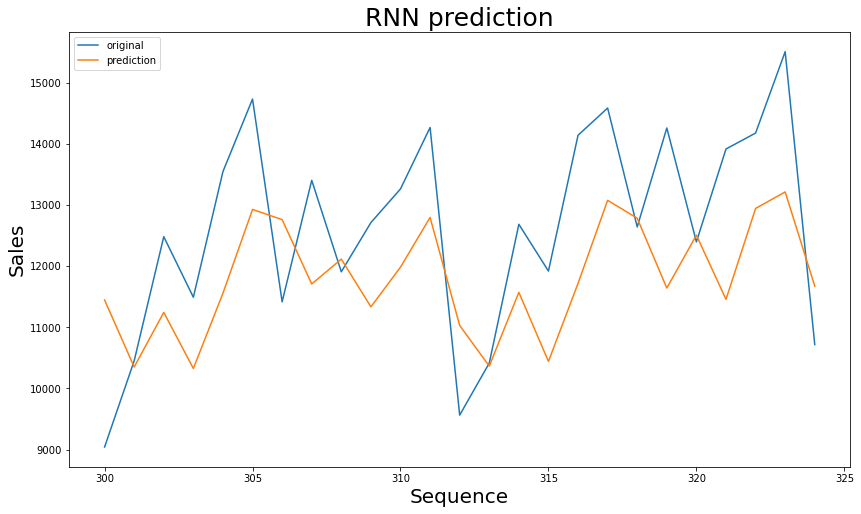

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 23ms/step - loss: 0.1265 - mae: 0.3099


[0.126522496342659, 0.30987632274627686]